# Doc2Vec

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/doc2vec](https://github.com/huseinzol05/Malaya/tree/master/example/doc2vec).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.19 s, sys: 598 ms, total: 4.79 s
Wall time: 4.16 s


In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [3]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
tweet1 = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

### Doc2Vec using Word Vector

```python
def doc2vec_wordvector(wordvector):
    """
    Doc2vec interface for text similarity using Word Vector.

    Parameters
    ----------
    wordvector : object
        malaya.wordvector.WordVector object.
        should have `get_vector_by_name` method.

    Returns
    -------
    result: malaya.similarity.Doc2VecSimilarity
    """
```

#### Using Interface

I will use `malaya.wordvector.load(model = 'news')`, pretty accurate related to local issues.

In [4]:
%%time

vocab_news, embedded_news = malaya.wordvector.load(model = 'news')
w2v = malaya.wordvector.WordVector(embedded_news, vocab_news)
doc2vec = malaya.similarity.doc2vec_wordvector(w2v)

CPU times: user 178 ms, sys: 118 ms, total: 296 ms
Wall time: 301 ms


#### predict batch of strings with probability

```python
def predict_proba(
    self,
    left_strings: List[str],
    right_strings: List[str],
    aggregation: Callable = np.mean,
    similarity: str = 'cosine',
    soft: bool = False,
):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    left_strings : list of str
    right_strings : list of str
    aggregation : Callable, optional (default=numpy.mean)
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    soft: bool, optional (default=False)
        word not inside word vector will replace with nearest word if True, else, will skip.

    Returns
    -------
    result: List[float]
    """
```

In [5]:
%%time

doc2vec.predict_proba([string1], [string2])

CPU times: user 1.53 ms, sys: 786 µs, total: 2.31 ms
Wall time: 1.68 ms


array([0.89971105])

In [6]:
%%time

doc2vec.predict_proba([string1, string2], [string3, string4])

CPU times: user 2.55 ms, sys: 1.44 ms, total: 3.99 ms
Wall time: 2.73 ms


array([0.91679387, 0.82348571])

In [7]:
%%time

doc2vec.predict_proba([string1, string2], [string3, tweet1])

CPU times: user 1.68 ms, sys: 381 µs, total: 2.06 ms
Wall time: 1.75 ms


array([0.91679387, 0.78542261])

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    aggregation: Callable = np.mean,
    similarity: str = 'cosine',
    soft: bool = False,
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from bert similarity.

    Parameters
    ----------
    strings : list of str
        list of strings
    aggregation : Callable, optional (default=numpy.mean)
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    soft: bool, optional (default=True)
        word not inside word vector will replace with nearest word if True, else, will skip.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results.
    """
```

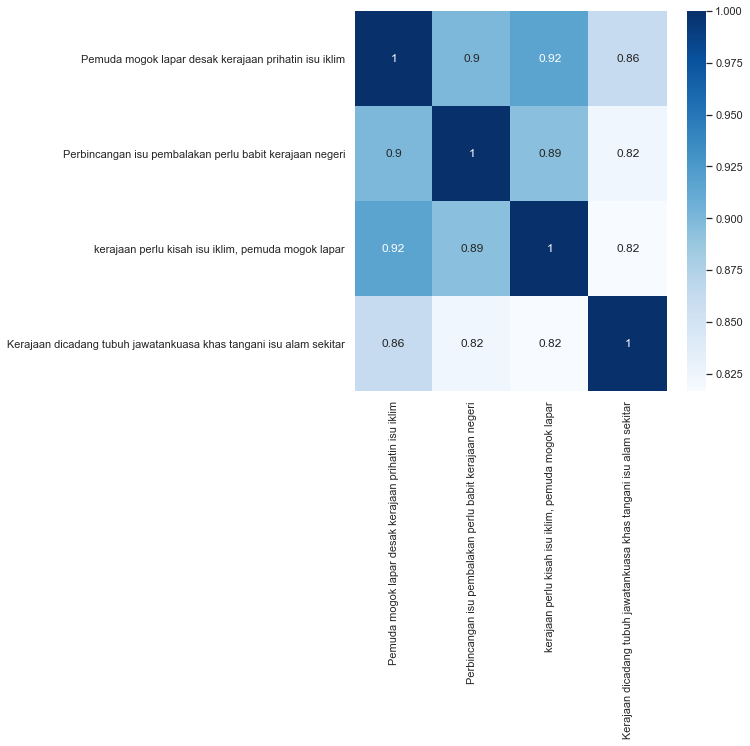

In [8]:
doc2vec.heatmap([string1, string2, string3, string4])

Different similarity function will return different percentage.

### Doc2Vec using Vectorizer Model

We can use any Vectorizer models provided by Malaya to use encoder similarity interface, example, BERT, XLNET. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

```python
def doc2vec_vectorizer(vectorizer):
    """
    Doc2vec interface for text similarity using Vectorizer model.

    Parameters
    ----------
    vectorizer : object
        vectorizer interface object, BERT, XLNET.
        should have `vectorize` method.

    Returns
    -------
    result: malaya.similarity.VectorizerSimilarity
    """
```

#### using ALXLNET

In [9]:
alxlnet = malaya.transformer.load(model = 'alxlnet')
doc2vec_vectorizer = malaya.similarity.doc2vec_vectorizer(alxlnet)

INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/alxlnet-model/base/alxlnet-base/model.ckpt


#### predict for 2 strings with probability

```python
def predict_proba(
    self,
    left_strings: List[str],
    right_strings: List[str],
    similarity: str = 'cosine',
):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    left_strings : list of str
    right_strings : list of str
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.

    Returns
    -------
    result: List[float]
    """
```

In [11]:
%%time

doc2vec_vectorizer.predict_proba([string1], [string2])

CPU times: user 1.49 s, sys: 103 ms, total: 1.59 s
Wall time: 1.34 s


array([0.89992255], dtype=float32)

In [12]:
%%time

doc2vec_vectorizer.predict_proba([string1, string2], [string3, string4])

CPU times: user 504 ms, sys: 118 ms, total: 621 ms
Wall time: 139 ms


array([0.64460504, 0.63204634], dtype=float32)

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    similarity: str = 'cosine',
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from bert similarity.

    Parameters
    ----------
    strings : list of str
        list of strings.
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results
    """
```

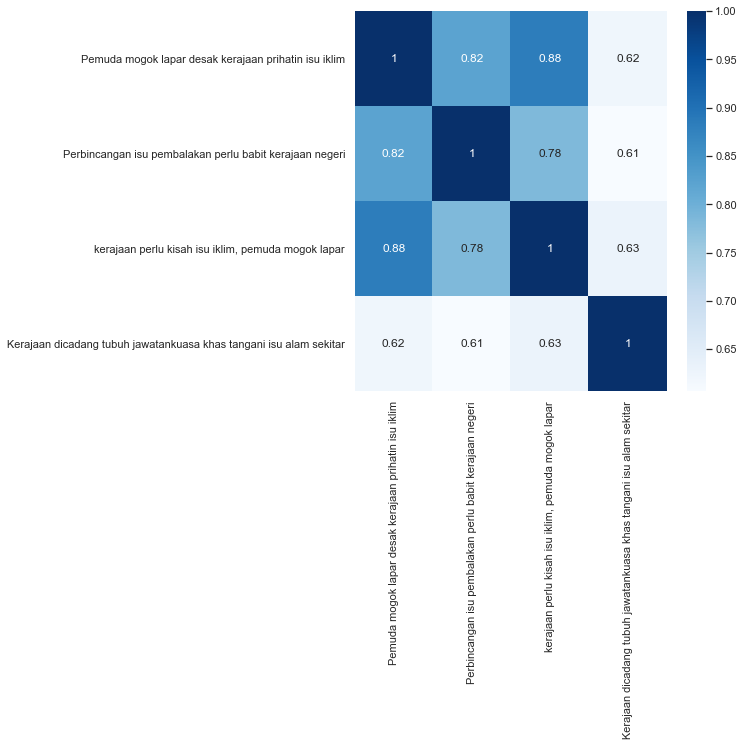

In [13]:
doc2vec_vectorizer.heatmap([string1, string2, string3, string4])